The EPA's current 24 hour standard for ozone is 0.070 parts per million (ppm) as the fourth-highest daily maximum 8-hour concentration, averaged across three consecutive years. In this study, I will look only at the maximum 8-hour concentrations.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#ozone0 = pd.read_table('C:\\Users\\Mary\\CIS5898\\daily_44201_1999.csv', delimiter = ',') #read in ozone data for 1999
ozone0 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_44201_1999.csv', low_memory=False) #read in ozone data for 1999

In [3]:
print(ozone0.info()) #provides basic information on data
print(ozone0.ndim) #provides dimensions
print(ozone0.shape) #provides number of rows and number of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317682 entries, 0 to 317681
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           317682 non-null  object 
 1   County Code          317682 non-null  int64  
 2   Site Num             317682 non-null  int64  
 3   Parameter Code       317682 non-null  int64  
 4   POC                  317682 non-null  int64  
 5   Latitude             317682 non-null  float64
 6   Longitude            317682 non-null  float64
 7   Datum                317682 non-null  object 
 8   Parameter Name       317682 non-null  object 
 9   Sample Duration      317682 non-null  object 
 10  Pollutant Standard   317682 non-null  object 
 11  Date Local           317682 non-null  object 
 12  Units of Measure     317682 non-null  object 
 13  Event Type           317682 non-null  object 
 14  Observation Count    317682 non-null  int64  
 15  Observation Perce

In [4]:
#There are 317,682 rows and 29 columns. Because there are so many columns, look at the first five rows and first 10 columns
ozone0.iloc[:5, :10]

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration
0,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR
1,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR
2,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR
3,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR
4,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR


In [5]:
#Look at the first five rows and next 9 columns
ozone0.iloc[:5, 11:20]

,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI
0,1999-02-28,Parts per million,None,1,6.0,0.029000,0.029,23,27
1,1999-03-01,Parts per million,None,17,100.0,0.027118,0.047,10,44
2,1999-03-02,Parts per million,None,17,100.0,0.049647,0.060,12,67
3,1999-03-03,Parts per million,None,17,100.0,0.039059,0.044,11,41
4,1999-03-04,Parts per million,None,17,100.0,0.032529,0.044,9,41


In [6]:
#Look at the first five rows and the final columns
ozone0.iloc[:5, 21:]

,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20
1,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20
2,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20
3,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20
4,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20


In [7]:
#Check whether there are excluded observations in event type
ozone0.groupby('Event Type').size()

Event Type
Excluded        19
Included     18925
None        298738
dtype: int64

In [8]:
#remove excluded event type observations
ozone0Cleaned = ozone0[ozone0['Event Type'] !=  'Excluded']

In [9]:
#check for state codes of 80 or CC (Country of Mexico or Canada) in ozone0Cleaned because
#data type of the state code is an object
print(np.count_nonzero(ozone0Cleaned['State Code']== '80' ))
print(np.count_nonzero(ozone0Cleaned['State Code']== 'CC' ))

3061
188


In [10]:
#remove observations from Mexico and Canada
ozone0ReCleaned = ozone0Cleaned[ozone0Cleaned['State Code'] != '80']
ozone0Recleaned = ozone0ReCleaned[ozone0ReCleaned['State Code'] != 'CC']
ozone0Recleaned.info()
#print(np.count_nonzero(ozone0ReCleaned['State Code']== 'CC' ))
#print(np.count_nonzero(ozone0Recleaned['State Code']== 'CC' ))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 314414 entries, 0 to 314432
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           314414 non-null  object 
 1   County Code          314414 non-null  int64  
 2   Site Num             314414 non-null  int64  
 3   Parameter Code       314414 non-null  int64  
 4   POC                  314414 non-null  int64  
 5   Latitude             314414 non-null  float64
 6   Longitude            314414 non-null  float64
 7   Datum                314414 non-null  object 
 8   Parameter Name       314414 non-null  object 
 9   Sample Duration      314414 non-null  object 
 10  Pollutant Standard   314414 non-null  object 
 11  Date Local           314414 non-null  object 
 12  Units of Measure     314414 non-null  object 
 13  Event Type           314414 non-null  object 
 14  Observation Count    314414 non-null  int64  
 15  Observation Perce

In [11]:
#The column of interest is the 1st Max Value. Extract that column and print a brief summary
x0Updated = ozone0ReCleaned['1st Max Value']
x0Updated.describe()

count    314602.000000
mean          0.045511
std           0.018595
min           0.000000
25%           0.032000
50%           0.044000
75%           0.057000
max           0.172000
Name: 1st Max Value, dtype: float64

In [12]:
ozone1 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_44201_2012.csv') #read in ozone data for 2012

In [13]:
print(ozone1.info()) #provides basic information on data
print(ozone1.ndim) #provides dimensions
print(ozone1.shape) #provides number of rows and number of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386439 entries, 0 to 386438
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           386439 non-null  int64  
 1   County Code          386439 non-null  int64  
 2   Site Num             386439 non-null  int64  
 3   Parameter Code       386439 non-null  int64  
 4   POC                  386439 non-null  int64  
 5   Latitude             386439 non-null  float64
 6   Longitude            386439 non-null  float64
 7   Datum                386439 non-null  object 
 8   Parameter Name       386439 non-null  object 
 9   Sample Duration      386439 non-null  object 
 10  Pollutant Standard   386439 non-null  object 
 11  Date Local           386439 non-null  object 
 12  Units of Measure     386439 non-null  object 
 13  Event Type           386439 non-null  object 
 14  Observation Count    386439 non-null  int64  
 15  Observation Perce

In [14]:
#Check whether there are excluded observations in event type
ozone1.groupby('Event Type').size()

Event Type
Excluded       354
Included     12538
None        373547
dtype: int64

In [15]:
#remove excluded event type observations
ozone1Cleaned = ozone1[ozone1['Event Type'] !=  'Excluded']

In [16]:
#check for state codes of 80 and CC in ozone1Cleaned
print(np.count_nonzero(ozone1Cleaned['State Code']== 80))
print(np.count_nonzero(ozone1Cleaned['State Code']== 'CC'))

1432
0


In [17]:
#remove observations with state codes of 80
ozone1ReCleaned = ozone1Cleaned[ozone1Cleaned['State Code']!= 80]

In [18]:
#Again, the column of interest is the 1st Max Value. Extract the column and print a brief summary
x1Updated = ozone1ReCleaned['1st Max Value']
x1Updated.describe()

count    384653.000000
mean          0.043062
std           0.014444
min           0.000000
25%           0.033000
50%           0.042000
75%           0.053000
max           0.136000
Name: 1st Max Value, dtype: float64

In [19]:
ozone2 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_44201_2020.csv') #read in ozone data for 2020

In [20]:
#Check whether there are excluded observations in event type
ozone2.groupby('Event Type').size()

Event Type
Excluded       369
Included      8208
None        383346
dtype: int64

In [21]:
#remove excluded event type observations
ozone2Cleaned = ozone2[ozone2['Event Type'] !=  'Excluded']

In [22]:
#check for state codes of 80 in ozone2Cleaned
np.count_nonzero(ozone2Cleaned['State Code']== 80)

146

In [23]:
#remove observations with state codes of 80
ozone2ReCleaned = ozone2Cleaned[ozone2Cleaned['State Code']!= 80]

In [24]:
#Again, the column of interest is the 1st Max Value. Extract the column and print a brief summary
x2Updated = ozone2ReCleaned['1st Max Value']
x2Updated.describe() 

count    391408.000000
mean          0.039174
std           0.012182
min          -0.003000
25%           0.031000
50%           0.039000
75%           0.046000
max           0.183000
Name: 1st Max Value, dtype: float64

In [25]:
#Look into the number of negative numbers in ozone 2020 dataset
countNegativeValues = np.count_nonzero(x2Updated < 0) #find count of negative values
print(countNegativeValues)
print((countNegativeValues / len(ozone2)) * 100) #find percentage of negative values 

2
0.0005103043199812208


In [26]:
#Ignore the 2 negative values in the 2020 dataset.

## Compare aggregate changes in ozone for years 1999, 2012, and 2020

Text(0, 0.5, 'sample values (ppm)')

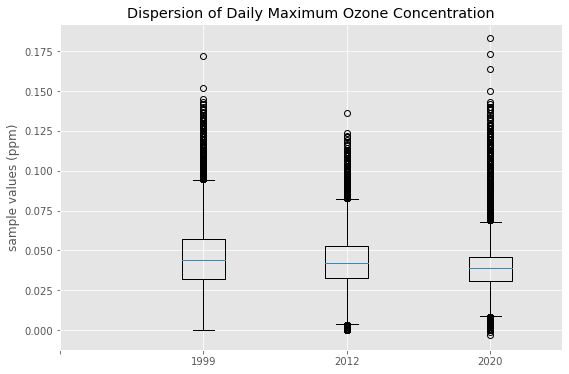

In [27]:
# Compare aggregate changes in ozone for years 1999, 2012, and 2020 by making boxplots.
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
fig = plt.figure(figsize = [9, 6]) #make larger
years = [x0Updated, x1Updated, x2Updated]
plt.boxplot(years)
plt.title('Dispersion of Daily Maximum Ozone Concentration')
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('sample values (ppm)')

In [28]:
plt.close()

The boxplot shows a slight downward trend in the median maximum ozone concentration from 1999 to 2020. The range of values is largest in the third dataset (2020). The third dataset has the most outliers and has the 
highest maximum value of the three datasets. 

Text(0, 0.5, 'sample values (ppm)')

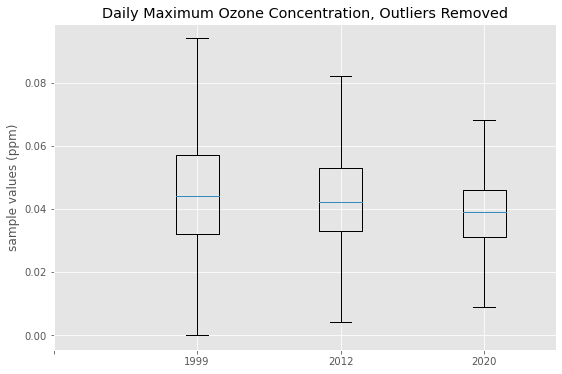

In [29]:
#re-create the boxplots removing the outliers
fig1 = plt.figure(figsize = [9, 6]) #make larger
years = [x0Updated, x1Updated, x2Updated]
plt.boxplot(years, showfliers=False)
plt.title('Daily Maximum Ozone Concentration, Outliers Removed')
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('sample values (ppm)')

In [30]:
plt.close()

## How have state levels of ozone changed over time?

In [31]:
#calculate the ozone for each state in 1999, 2012, and 2020
mn0 = ozone0Recleaned['1st Max Value'].groupby(ozone0Recleaned['State Code']).mean()
mn1 = ozone1ReCleaned['1st Max Value'].groupby(ozone1ReCleaned['State Code']).mean()
mn2 = ozone2ReCleaned['1st Max Value'].groupby(ozone2ReCleaned['State Code']).mean()

In [32]:
#Make separate data frames for states / years
d0 = pd.DataFrame(mn0.to_frame().reset_index())
d1 = pd.DataFrame(mn1.to_frame().reset_index())
d2 = pd.DataFrame(mn2.to_frame().reset_index())

### Compare 1999 and 2012 ozone levels

In [33]:
#check data types of state codes in dataframes before merging
print(d0.info())
print(d1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State Code     53 non-null     object 
 1   1st Max Value  53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 976.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State Code     52 non-null     int64  
 1   1st Max Value  52 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 960.0 bytes
None


In [34]:
#convert d0 State code from object to int so merge can occur
d0['State Code'] = d0['State Code'].astype(int)

In [35]:
mrg = pd.merge(d0, d1, on = 'State Code')
mrg.head()

,State Code,1st Max Value_x,1st Max Value_y
0,1,0.050486,0.043559
1,2,0.033153,0.028425
2,4,0.051214,0.048763
3,5,0.043615,0.042730
4,6,0.043602,0.043648


In [36]:
#rename columns
mrg = mrg.rename(columns = {'1st Max Value_x' : 'max x', '1st Max Value_y' : 'max y'})
#mrg

[Text(1, 0, '1999'), Text(3, 0, '2012')]

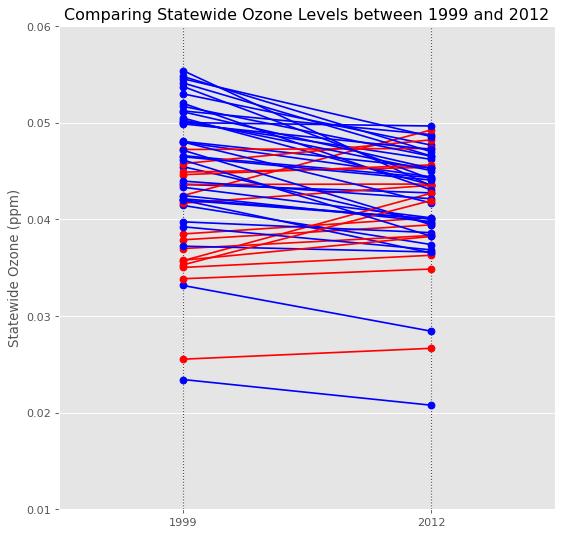

In [55]:
#Code for this plot was modified from slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='blue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 80)

# Vertical Lines 
#ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=1, ymin= 0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg['max x'], x=np.repeat(1, mrg.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg['max y'], x=np.repeat(3, mrg.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(mrg['max x'], mrg['max y'], mrg['State Code']):
    newline([1,p1], [3,p2])
    
# Decoration
ax.set_title("Comparing Statewide Ozone Levels between 1999 and 2012")
ax.set(xlim=(0,4), ylim=(0.01,0.06), ylabel='Statewide Ozone (ppm)')
ax.set_xticks([1,3])
ax.set_xticklabels(["1999", "2012"])

More states have decreased ozone levels from 1999 to 2012 than increased levels. Increases are depicted with red lines.

In [38]:
plt.close()

### Compare 2012 and 2020 ozone levels

In [39]:
#check data types of state codes in 2020 dataframe before merging
print(d2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State Code     52 non-null     int64  
 1   1st Max Value  52 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 960.0 bytes
None


In [40]:
mrg1 = pd.merge(d1, d2, on = 'State Code')
mrg1.head()

,State Code,1st Max Value_x,1st Max Value_y
0,1,0.043559,0.036378
1,2,0.028425,0.031169
2,4,0.048763,0.047856
3,5,0.042730,0.035418
4,6,0.043648,0.043002


In [41]:
#rename columns
mrg1 = mrg1.rename(columns = {'1st Max Value_x' : 'max x', '1st Max Value_y' : 'max y'})

[Text(1, 0, '2012'), Text(3, 0, '2022')]

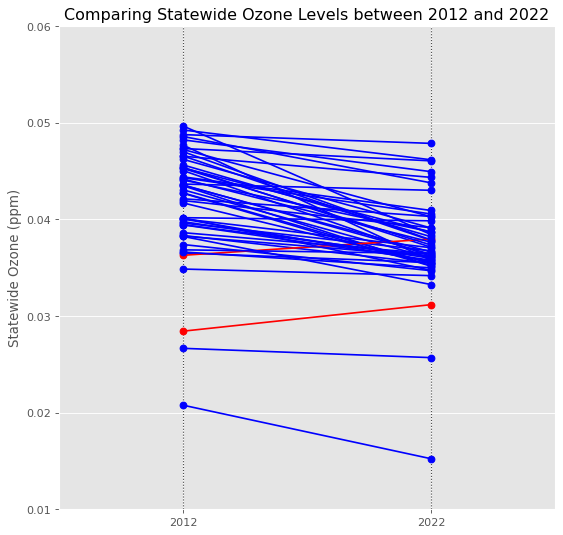

In [56]:
#Code for this plot was modified from slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='blue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 80)

# Vertical Lines 
#ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=1, ymin= 0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg1['max x'], x=np.repeat(1, mrg1.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1['max y'], x=np.repeat(3, mrg1.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(mrg1['max x'], mrg1['max y'], mrg1['State Code']):
    newline([1,p1], [3,p2])
    
# Decoration
ax.set_title('Comparing Statewide Ozone Levels between 2012 and 2022')
ax.set(xlim=(0,4), ylim=(0.01,0.06), ylabel='Statewide Ozone (ppm)')
ax.set_xticks([1,3])
ax.set_xticklabels(['2012', '2022'])

Most states have decreased ozone levels from 2012 to 2020. Two states
have increased levels; increases are depicted with red lines.

In [74]:
plt.close()

## Which states have the highest levels of ozone?


In [47]:
#Need a new datafile from AQS on site information
#This was completed in the PM2.5 studies and copied/pasted into this ozone notebook
sites = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Original_datasets\\aqs_sites.csv')


In [48]:
sitesSubset = sites[['State Code', 'State Name']]
sitesStateNames = sitesSubset['State Name'].unique()
sitesStateNames
#remove 'Country Of Mexico' and 'Canada' but leave in Guam, Puerto Rico, and Virgin Islands
cleanedSitesStateNames = np.delete(sitesStateNames, [-2, -1]) #by index
cleanedSitesStateNames

sitesStateCodes = sitesSubset['State Code'].unique()
sitesStateCodes
#remove the last two elements that correspond with Mexico and Canada
cleanedSitesStateCodes = np.delete(sitesStateCodes, [-2, -1]) #by index
cleanedSitesStateCodes

cleanedSites = pd.DataFrame(data = [cleanedSitesStateNames, cleanedSitesStateCodes]).T
cleanedSites.columns = ['State Name', 'State Code']
cleanedSites

cleanedSites['State Code'] = cleanedSites['State Code'].astype(int)
cleanedSites
print(cleanedSites.info())
print(cleanedSites)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Name  54 non-null     object
 1   State Code  54 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 776.0+ bytes
None
              State Name  State Code
0                Alabama           1
1                 Alaska           2
2                Arizona           4
3               Arkansas           5
4             California           6
5               Colorado           8
6            Connecticut           9
7               Delaware          10
8   District Of Columbia          11
9                Florida          12
10               Georgia          13
11                Hawaii          15
12                 Idaho          16
13              Illinois          17
14               Indiana          18
15                  Iowa          19
16                Kansas          20
17          

In [53]:
d0merged = d0.merge(cleanedSites, on='State Code', how = 'left')
d0TopTen = d0merged.sort_values('1st Max Value', ascending = False).head(10)
d0TopTen

,State Code,1st Max Value,State Name
10,13,0.055384,Georgia
42,47,0.054777,Tennessee
44,49,0.054535,Utah
17,21,0.054107,Kentucky
33,37,0.053741,North Carolina
14,18,0.052980,Indiana
24,28,0.052008,Mississippi
50,56,0.051687,Wyoming
2,4,0.051214,Arizona
48,54,0.051121,West Virginia


[Text(0.5, 0, 'Concentrations (ppm)'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '1999 Highest Concentrations of Ozone')]

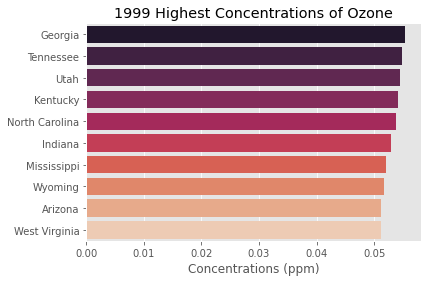

In [57]:
ax = sns.barplot(x = d0TopTen['1st Max Value'], y = d0TopTen['State Name'], palette = 'rocket')
ax.set(xlabel = 'Concentrations (ppm)', ylabel = '', title='1999 Highest Concentrations of Ozone')

In [64]:
plt.close()

In [58]:
#repeat top ten visualizations for years 2012 and 2020
d1merged = d1.merge(cleanedSites, on='State Code', how = 'left')
d1TopTen = d1merged.sort_values('1st Max Value', ascending = False).head(10)
d1TopTen

,State Code,1st Max Value,State Name
25,29,0.049654,Missouri
5,8,0.049241,Colorado
2,4,0.048763,Arizona
44,49,0.048563,Utah
28,32,0.048219,Nevada
14,18,0.047677,Indiana
31,35,0.047327,New Mexico
35,39,0.047230,Ohio
42,47,0.046996,Tennessee
17,21,0.046554,Kentucky


[Text(0.5, 0, 'Concentrations (ppm)'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '2012 Highest Concentrations of Ozone')]

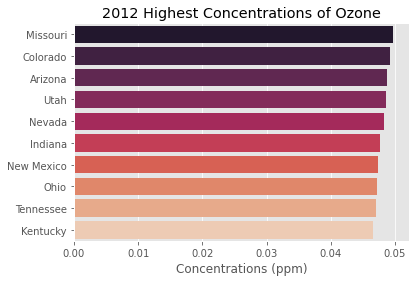

In [59]:
ax = sns.barplot(x = d1TopTen['1st Max Value'], y = d1TopTen['State Name'], palette = 'rocket')
ax.set(xlabel = 'Concentrations (ppm)', ylabel = '', title='2012 Highest Concentrations of Ozone')

In [63]:
plt.close()

In [60]:
d2merged = d2.merge(cleanedSites, on='State Code', how = 'left')
d2TopTen = d2merged.sort_values('1st Max Value', ascending = False).head(10)
d2TopTen

,State Code,1st Max Value,State Name
2,4,0.047856,Arizona
5,8,0.046161,Colorado
31,35,0.046047,New Mexico
28,32,0.044930,Nevada
50,56,0.044340,Wyoming
44,49,0.043773,Utah
4,6,0.043002,California
6,9,0.040913,Connecticut
12,16,0.040549,Idaho
39,44,0.040292,Rhode Island


[Text(0.5, 0, 'Concentrations (ppm)'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '2020 Highest Concentrations of Ozone')]

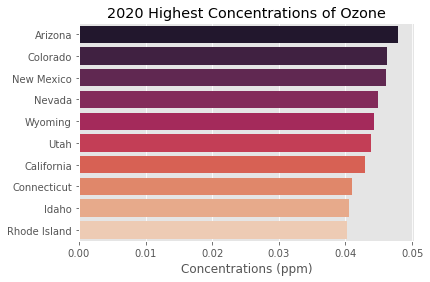

In [61]:
ax = sns.barplot(x = d2TopTen['1st Max Value'], y = d2TopTen['State Name'], palette = 'rocket')
ax.set(xlabel = 'Concentrations (ppm)', ylabel = '', title='2020 Highest Concentrations of Ozone')

In [62]:
plt.close()

## Which states have the lowest levels of ozone?

[Text(0.5, 0, 'Concentrations (ppm)'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '1999 Lowest Concentrations of Ozone')]

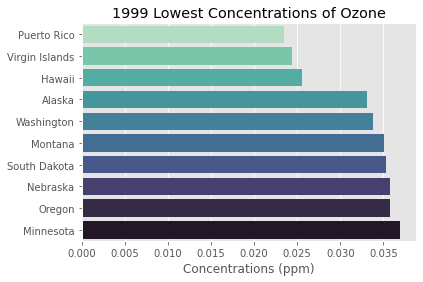

In [65]:
d0LowestTen = d0merged.sort_values('1st Max Value').head(10)
ax = sns.barplot(x = d0LowestTen['1st Max Value'], y = d0LowestTen['State Name'], palette = 'mako_r')
ax.set(xlabel = 'Concentrations (ppm)', ylabel = '', title='1999 Lowest Concentrations of Ozone')

In [69]:
plt.close()

[Text(0.5, 0, 'Concentrations (ppm)'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '2012 Lowest Concentrations of Ozone')]

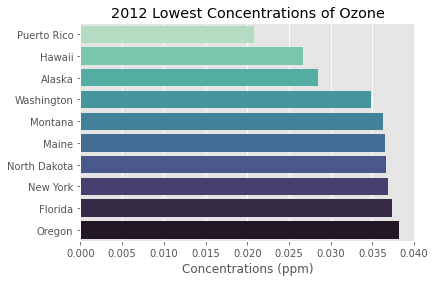

In [68]:
d1LowestTen = d1merged.sort_values('1st Max Value').head(10)
ax = sns.barplot(x = d1LowestTen['1st Max Value'], y = d1LowestTen['State Name'], palette = 'mako_r')
ax.set(xlabel = 'Concentrations (ppm)', ylabel = '', title='2012 Lowest Concentrations of Ozone')

In [70]:
plt.close()

[Text(0.5, 0, 'Concentrations (ppm)'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '2020 Lowest Concentrations of Ozone')]

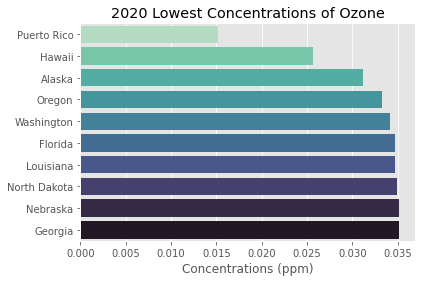

In [71]:
d2LowestTen = d2merged.sort_values('1st Max Value').head(10)
ax = sns.barplot(x = d2LowestTen['1st Max Value'], y = d2LowestTen['State Name'], palette = 'mako_r')
ax.set(xlabel = 'Concentrations (ppm)', ylabel = '', title='2020 Lowest Concentrations of Ozone')

In [72]:
plt.close()